In [1]:
import requests
import pandas as pd
from lxml import html

In [2]:


# URL of the Bundestag election results
url = "https://www.bundestag.de/parlament/wahlen/ergebnisse_seit1949-244692"

# Send GET request
response = requests.get(url)
response.raise_for_status()

# Parse HTML
tree = html.fromstring(response.content)

# XPath to the table
table_element = tree.xpath("//table[contains(@class, 'bt-table-data')]")


# Check if table exists
if not table_element:
    raise ValueError("Table not found using provided XPath.")

# Get the first table (there should be only one)
table_html = html.tostring(table_element[0], encoding="unicode").replace(",", ".")

# Read HTML into DataFrame
df = pd.read_html(table_html)[0].set_index("Jahr")
# df["Bündnis 90/Die Grünen"][2025] /= 10

# Show DataFrame
df

,CDU/CSU,SPD,FDP,Die Grünen,Bündnis 90/Die Grünen,Die Linke. PDS,AfD,SSW,Sonstige
Jahr,,,,,,,,,
2025,28.6,16.4,4.3,NaN,11.6,8.8,20.8,0.2,9.4
2021,24.1,25.7,11.5,NaN,14.8,4.9,10.3,0.1,8.7
2017,32.9,20.5,10.7,NaN,8.9,9.2,12.6,NaN,5.0
2013,41.5,25.7,4.8,NaN,8.4,8.6,4.7,NaN,6.3
2009,33.8,23.0,14.6,NaN,10.7,11.9,NaN,NaN,6.0
2005,35.2,34.2,9.8,NaN,8.1,8.7,NaN,NaN,4.0
2002,38.5,38.5,7.4,NaN,8.6,4.0,NaN,NaN,3.0
1998,35.2,40.9,6.2,NaN,6.7,5.1,NaN,NaN,5.9
1994,41.5,36.4,6.9,NaN,7.3,4.4,NaN,NaN,3.5


<AxesSubplot: xlabel='Jahr'>

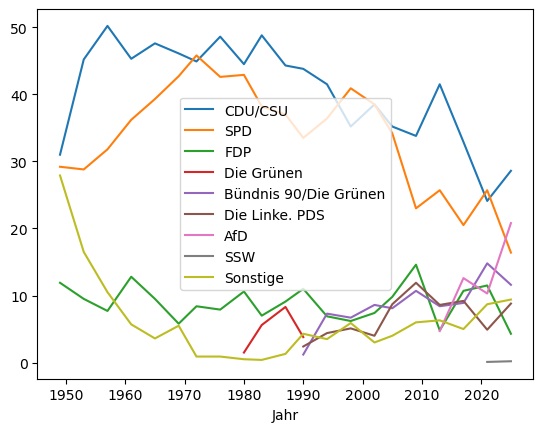

In [3]:
df.plot()

<AxesSubplot: xlabel='Jahr'>

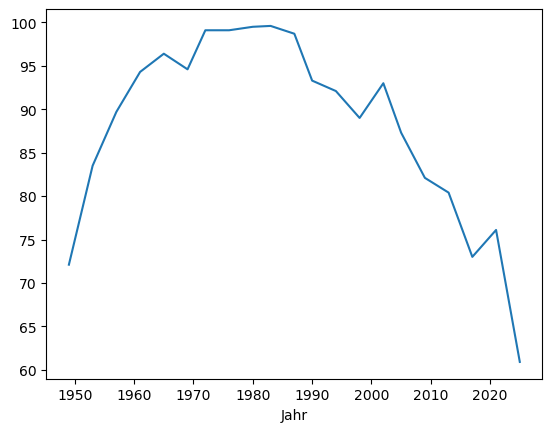

In [4]:
df[[
    "SPD",
    "CDU/CSU",
    "Die Grünen",
    "FDP",
    "Bündnis 90/Die Grünen",
]].sum(axis=1).rename("(ehemalige) Regierungsparteien").plot()